# 1 - Preparing data

In [4]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mypath = "./data"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['Books_small.json',
 'Grocery_small.json',
 'Clothing_small.json',
 'Patio_small.json',
 'Electronics_small.json']

In [6]:
data = pd.DataFrame()
for file in onlyfiles:
    path = mypath +'/'+ file
    df = pd.read_json(path,lines=True)
    df['category'] = file.split("_")[0] 
    data = pd.concat([data,df],axis=0,sort=True)
    
data.to_csv('./complete_data.csv',index=False)

In [7]:
data.head()

asin category helpful  overall  \
0  1495329321    Books  [0, 0]        4   
1  0399157565    Books  [0, 0]        2   
2  0984528105    Books  [0, 0]        4   
3  0804139024    Books  [0, 0]        5   
4  0765317583    Books  [0, 0]        5   

                                          reviewText   reviewTime  \
0  Da Silva takes the divine by storm with this u...  03 30, 2014   
1  For me personally it's the most disappointing ...  05 15, 2014   
2  Very simple book, but leaves you feeling good....  05 28, 2014   
3  I read a library copy of this exceptionally we...   04 3, 2014   
4  With the government knowing this could happen ...   04 9, 2014   

       reviewerID             reviewerName                       summary  \
0   A1E5ZR1Z4OQJG  Pure Jonel "Pure Jonel"        An amazing first novel   
1  A30PZPI6FPH0A7               Jackmollie                  disappointed   
2  A1GQ2UI5BKCCRD              Gail Hodges                     Good book   
3  A2DF4LQQI6KSQ2                     Olga  Science Fiction at its best!   
4   A1UAMAWY966P2        Nadyne M Ichimura               Excellent story   

   unixReviewTime  
0      1396137600  
1      1400112000  
2      1401235200  
3      1396483200  
4      1397001600

In [8]:
data['category'].value_counts()

Grocery        1000
Electronics    1000
Books          1000
Patio          1000
Clothing       1000
Name: category, dtype: int64

In [9]:
data.shape

(5000, 10)

# 2 - Train_test split

In [10]:
X = data['reviewText']
y = data['category']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=0)

# 3 - Frequency–Inverse Document Frequency

### The words of the input will be the columns of the matrix and the phrases will be the rows and the more times the word appears, less will be its weight

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)

In [14]:
X_test_vectorized=vectorizer.transform(X_test)

In [15]:
X_train_vectorized=pd.DataFrame(data=X_train_vectorized.toarray(),columns = vectorizer.get_feature_names())
X_test_vectorized=pd.DataFrame(data=X_test_vectorized.toarray(),columns = vectorizer.get_feature_names())

# 4 - Classificators

In [28]:
import numpy as np
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,NuSVC,SVC

In [26]:
 dict_classifiers = {"Random Forest": RandomForestClassifier(random_state=42, n_jobs=3),
    "Nearest Neighborns": KNeighborsClassifier(n_jobs=3),
    "Logistic Regression": LogisticRegression(solver = "liblinear",random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "LinearSVC": LinearSVC(random_state=0),
    "NuSVC": NuSVC(random_state=0),
    "SVC":SVC(random_state=0)
}

In [23]:
classifiers_names = list(dict_classifiers.keys())
classifiers_values=list(dict_classifiers.values())


In [24]:
def train_model(model):
    model.fit(X_train_vectorized,y_train)
    y_test_pred = model.predict(X_test_vectorized)
    print(classification_report(y_test, y_test_pred))
    print('\n')
    return times

In [25]:
times,precs = [],[]
for key,value in zip(classifiers_names,classifiers_values):
    print('------------------{}------------------'.format(key))
    Time=train_model(value)
    times.append(Time)

------------------Random Forest------------------
              precision    recall  f1-score   support

       Books       0.97      0.95      0.96       312
    Clothing       0.76      0.88      0.82       334
 Electronics       0.78      0.77      0.77       346
     Grocery       0.84      0.84      0.84       328
       Patio       0.87      0.78      0.82       330

    accuracy                           0.84      1650
   macro avg       0.84      0.84      0.84      1650
weighted avg       0.84      0.84      0.84      1650



------------------Nearest Neighborns------------------
              precision    recall  f1-score   support

       Books       0.90      0.92      0.91       312
    Clothing       0.78      0.87      0.82       334
 Electronics       0.85      0.80      0.83       346
     Grocery       0.89      0.79      0.84       328
       Patio       0.85      0.87      0.86       330

    accuracy                           0.85      1650
   macro avg       0.85 

/home/titowoche30/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

       Books       0.99      0.97      0.98       312
    Clothing       0.89      0.91      0.90       334
 Electronics       0.90      0.88      0.89       346
     Grocery       0.91      0.92      0.92       328
       Patio       0.90      0.92      0.91       330

    accuracy                           0.92      1650
   macro avg       0.92      0.92      0.92      1650
weighted avg       0.92      0.92      0.92      1650



------------------Gradient Boosting------------------
              precision    recall  f1-score   support

       Books       0.97      0.90      0.93       312
    Clothing       0.87      0.86      0.86       334
 Electronics       0.71      0.88      0.78       346
     Grocery       0.94      0.80      0.86       328
       Patio       0.87      0.85      0.86       330

    accuracy                           0.86      1650
   macro avg       0.87      0.86      0.86      1650
weighted avg       0.

# 5 - Grid_search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = LinearSVC(random_state=0)
model.fit(X_train_vectorized,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [31]:
penalty = ['l1', 'l2']
multi_class = ['ovr','crammer_singer']
C = [1, 10, 100, 1000]

parameters = dict(penalty=penalty, multi_class=multi_class, C=C)

grid = GridSearchCV(model, parameters, cv = 3, verbose = 2, n_jobs = 3)
grid.fit(X_train_vectorized, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    9.0s
[Parallel(n_jobs=3)]: Done  48 out of  48 | elapsed:   16.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1, 10, 100, 1000],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [32]:
model = grid.best_estimator_
model.fit(X_train_vectorized,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

# 6 - Evaluation

In [33]:
scores = cross_val_score(model, pd.concat([X_train_vectorized,X_test_vectorized]), pd.concat([y_train,y_test]), cv = 5, scoring='accuracy')
scores

array([0.929, 0.946, 0.932, 0.938, 0.931])

In [34]:
y_test_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Books       0.99      0.97      0.98       312
    Clothing       0.90      0.93      0.91       334
 Electronics       0.92      0.89      0.90       346
     Grocery       0.94      0.94      0.94       328
       Patio       0.92      0.94      0.93       330

    accuracy                           0.93      1650
   macro avg       0.93      0.93      0.93      1650
weighted avg       0.93      0.93      0.93      1650



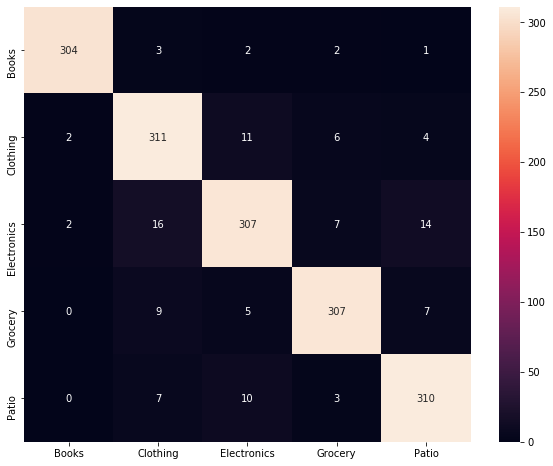

In [35]:
labels = ['Books','Clothing','Electronics','Grocery','Patio']
conf_matrix = confusion_matrix(y_test, y_test_pred,labels=labels)
conf_matrix = pd.DataFrame(conf_matrix,index=labels,columns=labels) 

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d')